# Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from statsmodels.formula.api import ols

pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('data/cleaned_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      10476 non-null  int64  
 1   App             10476 non-null  object 
 2   Category        10476 non-null  object 
 3   Rating          10476 non-null  float64
 4   Reviews         10476 non-null  float64
 5   Size            10476 non-null  float64
 6   Installs        10476 non-null  int64  
 7   Content Rating  10476 non-null  int64  
 8   Genres          10476 non-null  int64  
 9   Month           10476 non-null  int64  
 10  is_free         10476 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 900.4+ KB


In [4]:
df.drop(['Unnamed: 0', 'App'], axis=1, inplace=True)

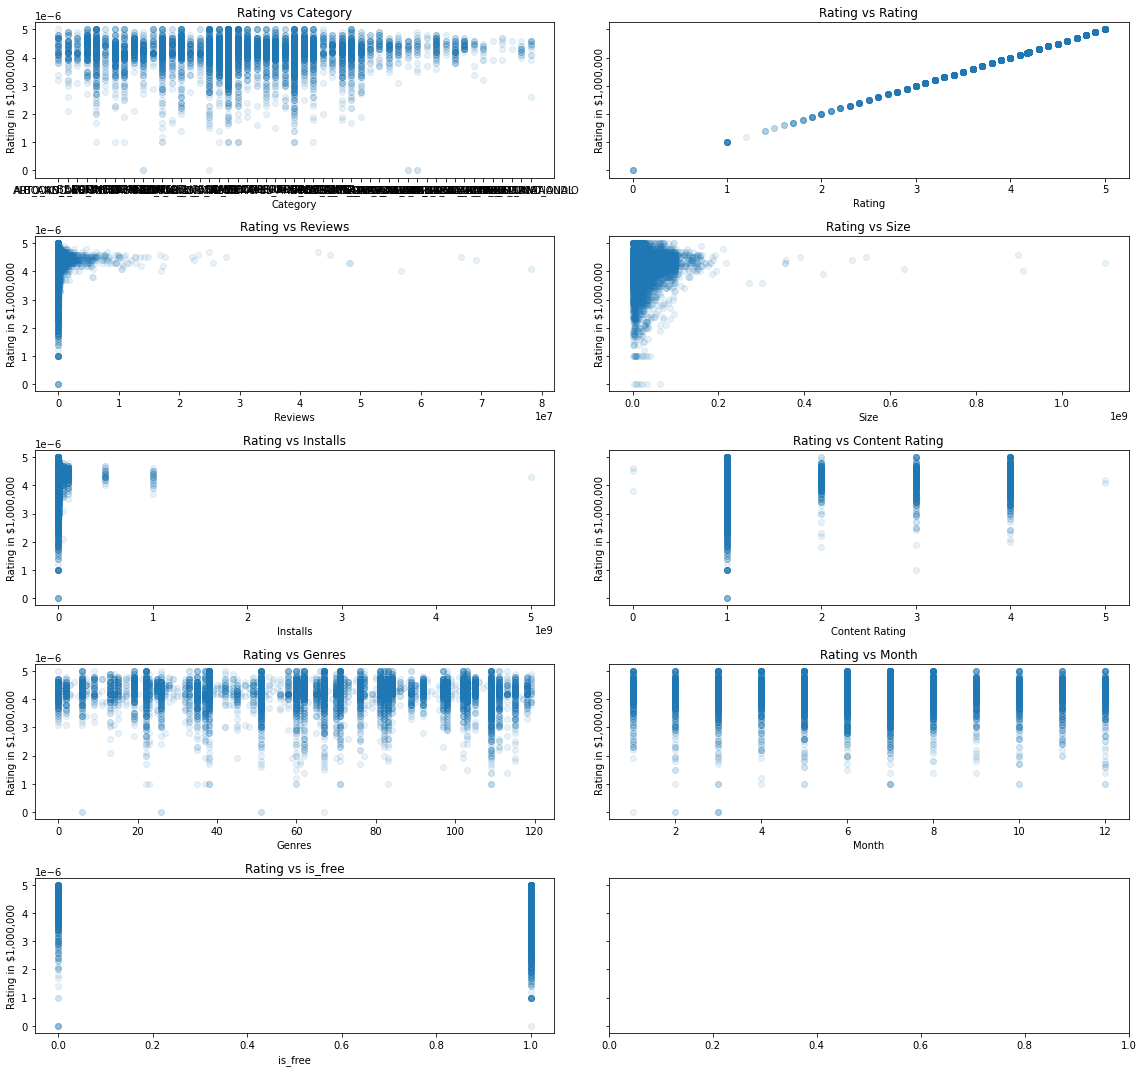

In [5]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(16,15), sharey=True)

for ax, column in zip(axes.flatten(), df.columns):
    ax.scatter(df[column], df['Rating'] / 1_000_000, label=column, alpha=.1)
    ax.set_title(f'Rating vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Rating in $1,000,000')

fig.tight_layout()

Clearly, the data needs a lot of preprocessing to improve the results. Here you can see the relationship between 'Rating' and the independent variables. We can see what variables are continuous(Reviews, Size, and Installs) and categorical(Category, Content Rating, and Month).

In [6]:
df['Month'] = df['Month'].astype('object')

In [7]:
cats = df.select_dtypes(include='object')

In [8]:
cats_dummies = pd.get_dummies(cats, columns=['Category', 'Month'], drop_first=True)

In [9]:
model_df = pd.concat((df, cats_dummies), axis=1)
model_df.drop(columns=['Category', 'Month'], axis = 1, inplace=True)
model_df

,Rating,Reviews,Size,Installs,Content Rating,Genres,is_free,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_GAME_ACTION,Category_GAME_ADVENTURE,Category_GAME_ARCADE,Category_GAME_BOARD,Category_GAME_CARD,Category_GAME_CASINO,Category_GAME_CASUAL,Category_GAME_EDUCATIONAL,Category_GAME_MUSIC,Category_GAME_PUZZLE,Category_GAME_RACING,Category_GAME_ROLE_PLAYING,Category_GAME_SIMULATION,Category_GAME_SPORTS,Category_GAME_STRATEGY,Category_GAME_TRIVIA,Category_GAME_WORD,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_MUSIC_AND_AUDIO,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,4.1,159.0,1.900000e+07,10000,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,1.400000e+07,500000,1,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,8.700000e+06,5000000,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4.5,215644.0,2.500000e+07,50000000,4,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4.3,967.0,2.800000e+06,100000,1,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10471,4.6,105363.0,3.100000e+07,10000000,1,38,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10472,4.7,165252.0,3.400000e+07,100000000,1,109,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
10473,3.9,1406630.0,2.099254e+07,100000000,4,19,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10474,4.4,7285.0,2.500000e+07,1000000,1,51,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [10]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10476 entries, 0 to 10475
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rating                        10476 non-null  float64
 1   Reviews                       10476 non-null  float64
 2   Size                          10476 non-null  float64
 3   Installs                      10476 non-null  int64  
 4   Content Rating                10476 non-null  int64  
 5   Genres                        10476 non-null  int64  
 6   is_free                       10476 non-null  int64  
 7   Category_AUTO_AND_VEHICLES    10476 non-null  uint8  
 8   Category_BEAUTY               10476 non-null  uint8  
 9   Category_BOOKS_AND_REFERENCE  10476 non-null  uint8  
 10  Category_BUSINESS             10476 non-null  uint8  
 11  Category_COMICS               10476 non-null  uint8  
 12  Category_COMMUNICATION        10476 non-null  uint8  
 13  C

In [11]:
model_df.columns = model_df.columns.str.replace(' ', '_').str.replace('+','')

# Baseline Model

In [12]:
outcome = 'Rating'
predictors = model_df.drop(['Rating'], axis=1)
pred_sum = '+'.join(predictors.columns)
f = outcome + '~' + pred_sum
model = ols(f, model_df).fit()
print(f'List of predictors: {pred_sum}')
display(model.summary())

List of predictors: Reviews+Size+Installs+Content_Rating+Genres+is_free+Category_AUTO_AND_VEHICLES+Category_BEAUTY+Category_BOOKS_AND_REFERENCE+Category_BUSINESS+Category_COMICS+Category_COMMUNICATION+Category_DATING+Category_EDUCATION+Category_ENTERTAINMENT+Category_EVENTS+Category_FAMILY+Category_FINANCE+Category_FOOD_AND_DRINK+Category_GAME+Category_GAME_ACTION+Category_GAME_ADVENTURE+Category_GAME_ARCADE+Category_GAME_BOARD+Category_GAME_CARD+Category_GAME_CASINO+Category_GAME_CASUAL+Category_GAME_EDUCATIONAL+Category_GAME_MUSIC+Category_GAME_PUZZLE+Category_GAME_RACING+Category_GAME_ROLE_PLAYING+Category_GAME_SIMULATION+Category_GAME_SPORTS+Category_GAME_STRATEGY+Category_GAME_TRIVIA+Category_GAME_WORD+Category_HEALTH_AND_FITNESS+Category_HOUSE_AND_HOME+Category_LIBRARIES_AND_DEMO+Category_LIFESTYLE+Category_MAPS_AND_NAVIGATION+Category_MEDICAL+Category_MUSIC_AND_AUDIO+Category_NEWS_AND_MAGAZINES+Category_PARENTING+Category_PERSONALIZATION+Category_PHOTOGRAPHY+Category_PRODUCTIVIT

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     7.702
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           1.80e-68
Time:                        11:26:37   Log-Likelihood:                -7421.6
No. Observations:               10476   AIC:                         1.498e+04
Df Residuals:                   10408   BIC:                         1.547e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        4.3624      0.066     66.494      0.000       4.234       4.491
Reviews                       9.549e-09   2.86e-09      3.339      0.001    3.94e-09    1.52e-08
Size                          2.557e-10   1.71e-10      1.493      0.135   -7.99e-11    5.91e-10
Installs                      7.844e-11   7.27e-11      1.080      0.280    -6.4e-11    2.21e-10
Content_Rating                   0.0024      0.005      0.441      0.659      -0.008       0.013
Genres                       -3.578e-06      0.000     -0.012      0.990      -0.001       0.001
is_free                         -0.0563      0.016     -3.419      0.001      -0.089      -0.024
Category_AUTO_AND_VEHICLES      -0.1681      0.080     -2.106      0.035      -0.325      -0.012
Category_BEAUTY                 -0.0778      0.091     -0.857      0.391      -0.256       0.100
Category_BOOKS_AND_REFERENCE    -0.0183      0.068     -0.269      0.788      -0.152       0.115
Category_BUSINESS               -0.2087      0.065     -3.214      0.001      -0.336      -0.081
Category_COMICS                 -0.1667      0.086     -1.928      0.054      -0.336       0.003
Category_COMMUNICATION          -0.2392      0.067     -3.591      0.000      -0.370      -0.109
Category_DATING                 -0.3827      0.072     -5.347      0.000      -0.523      -0.242
Category_EDUCATION              -0.0002      0.073     -0.003      0.998      -0.143       0.142
Category_ENTERTAINMENT          -0.3250      0.076     -4.278      0.000      -0.474      -0.176
Category_EVENTS                  0.0100      0.087      0.114      0.909      -0.161       0.181
Category_FAMILY                 -0.1615      0.063     -2.565      0.010      -0.285      -0.038
Category_FINANCE                -0.2286      0.067     -3.387      0.001      -0.361      -0.096
Category_FOOD_AND_DRINK         -0.1940      0.078     -2.497      0.013      -0.346      -0.042
Category_GAME                   -0.1184      0.063     -1.879      0.060      -0.242       0.005
Category_GAME_ACTION            -0.1075      0.090     -1.200      0.230      -0.283       0.068
Category_GAME_ADVENTURE         -0.0699      0.103     -0.680      0.497      -0.271       0.132
Category_GAME_ARCADE            -0.3035      0.110     -2.749      0.006      -0.520      -0.087
Category_GAME_BOARD              0.0903      0.146      0.620      0.536      -0.195       0.376
Category_GAME_CARD              -0.0214      0.146     -0.147      0.883      -0.307       0.264
Category_GAME_CASINO             0.1127      0.104      1.087      0.277      -0.091       0.316
Category_GAME_CASUAL            -0.3056      0.112     -2.728      0.006      -0.525      -0.086
Category_GAME_EDUCATIONAL       -0.0826      0.142     -0.583      0.560    

In [13]:
y = model_df['Rating']
X = model_df.drop('Rating', axis=1)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(len(X_train), len(X_test), len(y_train), len(y_test))

7857 2619 7857 2619


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
linreg = LinearRegression()

In [16]:
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('MAE:', mean_absolute_error(y_test, y_hat_test))
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)
print('Root Mean Squared Error Train:', rmse_train)
print('Root Mean Squared Error Test:', rmse_test)

MAE: 0.3298287962372563
Train Mean Squared Error: 0.24232182015329332
Test Mean Squared Error: 0.2410102287601577
Root Mean Squared Error Train: 0.49226194262129724
Root Mean Squared Error Test: 0.4909279262378111


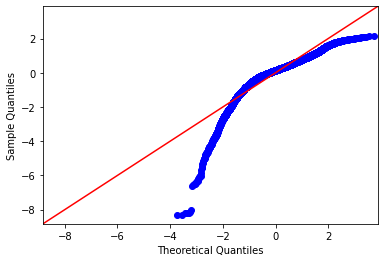

In [17]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

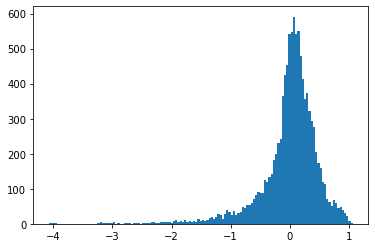

In [18]:
plt.hist(residuals, bins='auto');

# Outliers

In [19]:
from numpy import mean
from numpy import std

<AxesSubplot:xlabel='Reviews'>

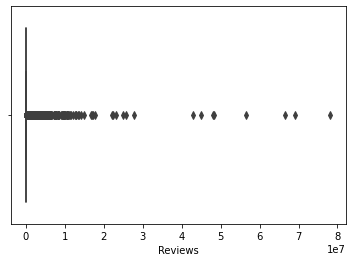

In [20]:
sns.boxplot(x=model_df['Reviews'])

In [21]:
def outliers(col, df):
    mean = df[col].mean()
    std = df[col].std()
    cut_off = std * 3
    lower = mean - cut_off
    upper = mean + cut_off
    outliers = [x for x in df[col] if x < lower or x > upper]
    return sorted(outliers)

In [22]:
outliers('Reviews', model_df)

[6074334.0,
 6120977.0,
 6181640.0,
 6198563.0,
 6207063.0,
 6210998.0,
 6289924.0,
 6427773.0,
 6466641.0,
 6474426.0,
 6702776.0,
 7165362.0,
 7232629.0,
 7295707.0,
 7305991.0,
 7464996.0,
 7529865.0,
 7594559.0,
 7614130.0,
 7671249.0,
 7790693.0,
 7820209.0,
 8033493.0,
 8118609.0,
 8118880.0,
 8190074.0,
 8219586.0,
 8389714.0,
 8606259.0,
 8923587.0,
 9235155.0,
 9349147.0,
 9605687.0,
 9638674.0,
 9642995.0,
 9879473.0,
 9881829.0,
 9882639.0,
 10053186.0,
 10055521.0,
 10216538.0,
 10424925.0,
 10484169.0,
 10485308.0,
 10790289.0,
 10858556.0,
 10979062.0,
 11334799.0,
 11667403.0,
 12118432.0,
 12640551.0,
 12759663.0,
 12842860.0,
 13479633.0,
 13754267.0,
 14198297.0,
 14891223.0,
 16771865.0,
 17014787.0,
 17350637.0,
 17712922.0,
 22172354.0,
 22426677.0,
 23133508.0,
 24900999.0,
 25655305.0,
 27722264.0,
 42916526.0,
 44891723.0,
 48120002.0,
 48326803.0,
 56642847.0,
 66577313.0,
 69119316.0,
 78158306.0]

In [23]:
model_out = model_df[(model_df['Reviews'] <= 6074334) & (model_df['Reviews'] >= 100)]
model_out.reset_index(drop=True)

,Rating,Reviews,Size,Installs,Content_Rating,Genres,is_free,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_GAME_ACTION,Category_GAME_ADVENTURE,Category_GAME_ARCADE,Category_GAME_BOARD,Category_GAME_CARD,Category_GAME_CASINO,Category_GAME_CASUAL,Category_GAME_EDUCATIONAL,Category_GAME_MUSIC,Category_GAME_PUZZLE,Category_GAME_RACING,Category_GAME_ROLE_PLAYING,Category_GAME_SIMULATION,Category_GAME_SPORTS,Category_GAME_STRATEGY,Category_GAME_TRIVIA,Category_GAME_WORD,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_MUSIC_AND_AUDIO,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,4.1,159.0,1.900000e+07,10000,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,1.400000e+07,500000,1,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,8.700000e+06,5000000,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4.5,215644.0,2.500000e+07,50000000,4,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4.3,967.0,2.800000e+06,100000,1,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7042,4.6,105363.0,3.100000e+07,10000000,1,38,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
7043,4.7,165252.0,3.400000e+07,100000000,1,109,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7044,3.9,1406630.0,2.099254e+07,100000000,4,19,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
7045,4.4,7285.0,2.500000e+07,1000000,1,51,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Installs'>

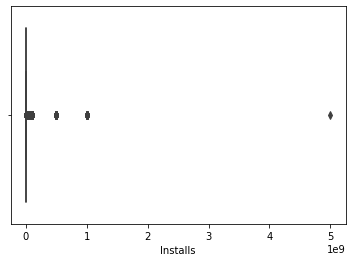

In [24]:
sns.boxplot(x=model_df['Installs'])

In [25]:
outliers('Installs', model_out)

[500000000,
 500000000,
 500000000,
 500000000,
 500000000,
 500000000,
 500000000,
 500000000,
 500000000,
 500000000,
 500000000,
 500000000,
 1000000000,
 1000000000,
 1000000000,
 1000000000,
 1000000000,
 1000000000,
 1000000000,
 1000000000,
 1000000000,
 1000000000,
 1000000000,
 5000000000]

In [26]:
model_out = model_out[(model_out['Installs'] < 50000000) & (model_out['Installs'] >= 1000)]
model_out.reset_index(drop=True)

,Rating,Reviews,Size,Installs,Content_Rating,Genres,is_free,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_GAME_ACTION,Category_GAME_ADVENTURE,Category_GAME_ARCADE,Category_GAME_BOARD,Category_GAME_CARD,Category_GAME_CASINO,Category_GAME_CASUAL,Category_GAME_EDUCATIONAL,Category_GAME_MUSIC,Category_GAME_PUZZLE,Category_GAME_RACING,Category_GAME_ROLE_PLAYING,Category_GAME_SIMULATION,Category_GAME_SPORTS,Category_GAME_STRATEGY,Category_GAME_TRIVIA,Category_GAME_WORD,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_MUSIC_AND_AUDIO,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,4.1,159.0,1.900000e+07,10000,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,1.400000e+07,500000,1,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,8.700000e+06,5000000,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4.3,967.0,2.800000e+06,100000,1,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4.4,167.0,5.600000e+06,50000,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6548,4.2,44087.0,1.250000e+08,10000000,1,83,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6549,3.9,6617.0,2.099254e+07,1000000,1,103,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6550,4.6,105363.0,3.100000e+07,10000000,1,38,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6551,4.4,7285.0,2.500000e+07,1000000,1,51,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Installs'>

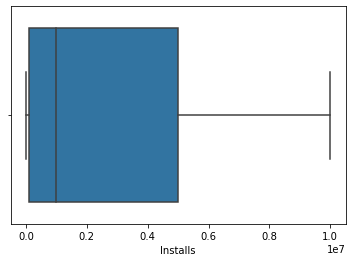

In [27]:
sns.boxplot(x=model_out['Installs'])

<AxesSubplot:xlabel='Size'>

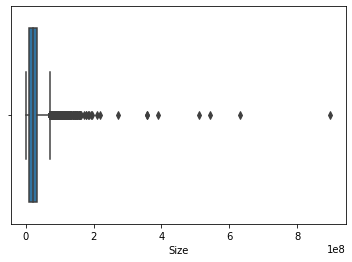

In [28]:
sns.boxplot(x=model_out['Size'])

In [29]:
outliers('Size', model_out)

[123000000.0,
 123000000.0,
 124000000.0,
 125000000.0,
 126000000.0,
 126000000.0,
 128000000.0,
 129000000.0,
 129000000.0,
 129000000.0,
 129000000.0,
 131000000.0,
 131000000.0,
 132000000.0,
 133000000.0,
 133000000.0,
 134000000.0,
 135000000.0,
 138000000.0,
 138000000.0,
 139000000.0,
 139000000.0,
 139000000.0,
 141000000.0,
 142000000.0,
 145000000.0,
 146000000.0,
 146000000.0,
 149000000.0,
 149000000.0,
 150000000.0,
 150000000.0,
 150000000.0,
 151000000.0,
 151000000.0,
 151000000.0,
 151000000.0,
 152000000.0,
 154000000.0,
 156000000.0,
 156000000.0,
 157000000.0,
 157000000.0,
 158000000.0,
 159000000.0,
 159000000.0,
 159000000.0,
 161000000.0,
 162000000.0,
 170000000.0,
 176000000.0,
 177000000.0,
 184000000.0,
 186000000.0,
 191000000.0,
 195000000.0,
 210000000.0,
 218000000.0,
 272000000.0,
 356000000.0,
 358000000.0,
 391000000.0,
 512000000.0,
 543000000.0,
 633000000.0,
 898000000.0]

In [30]:
model_out = model_out[(model_out['Size'] < 123000000)]
model_out.reset_index(drop=True)

,Rating,Reviews,Size,Installs,Content_Rating,Genres,is_free,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_GAME_ACTION,Category_GAME_ADVENTURE,Category_GAME_ARCADE,Category_GAME_BOARD,Category_GAME_CARD,Category_GAME_CASINO,Category_GAME_CASUAL,Category_GAME_EDUCATIONAL,Category_GAME_MUSIC,Category_GAME_PUZZLE,Category_GAME_RACING,Category_GAME_ROLE_PLAYING,Category_GAME_SIMULATION,Category_GAME_SPORTS,Category_GAME_STRATEGY,Category_GAME_TRIVIA,Category_GAME_WORD,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_MUSIC_AND_AUDIO,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,4.1,159.0,1.900000e+07,10000,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,1.400000e+07,500000,1,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,8.700000e+06,5000000,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4.3,967.0,2.800000e+06,100000,1,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4.4,167.0,5.600000e+06,50000,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6482,4.1,166401.0,4.100000e+07,10000000,1,102,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6483,3.9,6617.0,2.099254e+07,1000000,1,103,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6484,4.6,105363.0,3.100000e+07,10000000,1,38,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6485,4.4,7285.0,2.500000e+07,1000000,1,51,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Rating'>

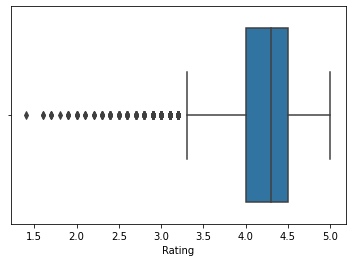

In [31]:
sns.boxplot(x=model_out['Rating'])

The median looks to be around 4.3. Anything beyond 3.3 and 5 are outliers. We will use these as our markers.

In [32]:
model_out = model_out[(model_out['Rating'] > 3.3)]
model_out.reset_index(drop=True)

,Rating,Reviews,Size,Installs,Content_Rating,Genres,is_free,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_GAME_ACTION,Category_GAME_ADVENTURE,Category_GAME_ARCADE,Category_GAME_BOARD,Category_GAME_CARD,Category_GAME_CASINO,Category_GAME_CASUAL,Category_GAME_EDUCATIONAL,Category_GAME_MUSIC,Category_GAME_PUZZLE,Category_GAME_RACING,Category_GAME_ROLE_PLAYING,Category_GAME_SIMULATION,Category_GAME_SPORTS,Category_GAME_STRATEGY,Category_GAME_TRIVIA,Category_GAME_WORD,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_MUSIC_AND_AUDIO,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,4.1,159.0,1.900000e+07,10000,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.9,967.0,1.400000e+07,500000,1,12,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4.7,87510.0,8.700000e+06,5000000,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4.3,967.0,2.800000e+06,100000,1,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,4.4,167.0,5.600000e+06,50000,1,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6167,4.1,166401.0,4.100000e+07,10000000,1,102,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6168,3.9,6617.0,2.099254e+07,1000000,1,103,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6169,4.6,105363.0,3.100000e+07,10000000,1,38,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6170,4.4,7285.0,2.500000e+07,1000000,1,51,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [33]:
model_out.describe()

,Rating,Reviews,Size,Installs,Content_Rating,Genres,is_free,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_GAME_ACTION,Category_GAME_ADVENTURE,Category_GAME_ARCADE,Category_GAME_BOARD,Category_GAME_CARD,Category_GAME_CASINO,Category_GAME_CASUAL,Category_GAME_EDUCATIONAL,Category_GAME_MUSIC,Category_GAME_PUZZLE,Category_GAME_RACING,Category_GAME_ROLE_PLAYING,Category_GAME_SIMULATION,Category_GAME_SPORTS,Category_GAME_STRATEGY,Category_GAME_TRIVIA,Category_GAME_WORD,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_MUSIC_AND_AUDIO,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
count,6172.000000,6.172000e+03,6.172000e+03,6.172000e+03,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.00000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000,6172.000000
mean,4.258054,7.737171e+04,2.549391e+07,2.526645e+06,1.563351,64.481367,0.889501,0.009397,0.005185,0.022035,0.021549,0.008263,0.027382,0.016364,0.024141,0.017336,0.004375,0.176766,0.034187,0.012800,0.114064,0.005833,0.003564,0.002916,0.002106,0.001782,0.004537,0.001458,0.001620,0.000648,0.003889,0.000486,0.005995,0.005347,0.001458,0.008263,0.000324,0.000162,0.032404,0.009883,0.007291,0.029974,0.013286,0.021387,0.001782,0.023817,0.006481,0.034349,0.029164,0.032242,0.022683,0.025437,0.035645,0.073720,0.020415,0.01604,0.011017,0.047472,0.063189,0.052009,0.089274,0.122327,0.283701,0.146144,0.031594,0.038561,0.037265,0.044232
std,0.322726,1.979052e+05,2.349403e+07,3.678033e+06,1.082426,34.663671,0.313536,0.096491,0.071824,0.146809,0.145217,0.090533,0.163206,0.126882,0.153500,0.130532,0.066001,0.381501,0.181723,0.112419,0.317914,0.076156,0.059602,0.053929,0.045850,0.042182,0.067207,0.038162,0.040223,0.025451,0.062242,0.022043,0.077200,0.072931,0.038162,0.090533,0.018000,0.012729,0.177086,0.098931,0.085082,0.170530,0.114505,0.144682,0.042182,0.152492,0.080249,0.182138,0.168280,0.176657,0.148903,0.157462,0.185418,0.261336,0.141426,0.12564,0.104393,0.212664,0.243322,0.222063,0.285162,0.327689,0.450830,0.353279,0.174932,0.192562,0.189426,0.205627
min,3.400000,1.000000e+02,8.500000e+03,1.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.100000,1.185000e+03,8.100000e+06,1.000000e+05,1.000000,37.000000,1.000000,

# Model - Outliers Fixed

In [34]:
outcome = 'Rating'
predictors = model_out.drop(['Rating'], axis=1)
pred_sum = '+'.join(predictors.columns)
f = outcome + '~' + pred_sum
model = ols(f, model_out).fit()
print(f'List of predictors: {pred_sum}')
display(model.summary())

List of predictors: Reviews+Size+Installs+Content_Rating+Genres+is_free+Category_AUTO_AND_VEHICLES+Category_BEAUTY+Category_BOOKS_AND_REFERENCE+Category_BUSINESS+Category_COMICS+Category_COMMUNICATION+Category_DATING+Category_EDUCATION+Category_ENTERTAINMENT+Category_EVENTS+Category_FAMILY+Category_FINANCE+Category_FOOD_AND_DRINK+Category_GAME+Category_GAME_ACTION+Category_GAME_ADVENTURE+Category_GAME_ARCADE+Category_GAME_BOARD+Category_GAME_CARD+Category_GAME_CASINO+Category_GAME_CASUAL+Category_GAME_EDUCATIONAL+Category_GAME_MUSIC+Category_GAME_PUZZLE+Category_GAME_RACING+Category_GAME_ROLE_PLAYING+Category_GAME_SIMULATION+Category_GAME_SPORTS+Category_GAME_STRATEGY+Category_GAME_TRIVIA+Category_GAME_WORD+Category_HEALTH_AND_FITNESS+Category_HOUSE_AND_HOME+Category_LIBRARIES_AND_DEMO+Category_LIFESTYLE+Category_MAPS_AND_NAVIGATION+Category_MEDICAL+Category_MUSIC_AND_AUDIO+Category_NEWS_AND_MAGAZINES+Category_PARENTING+Category_PERSONALIZATION+Category_PHOTOGRAPHY+Category_PRODUCTIVIT

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     10.78
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          1.74e-103
Time:                        11:26:41   Log-Likelihood:                -1431.8
No. Observations:                6172   AIC:                             3000.
Df Residuals:                    6104   BIC:                             3457.
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        4.4681      0.047     94.444      0.000       4.375       4.561
Reviews                       3.037e-07   2.53e-08     12.026      0.000    2.54e-07    3.53e-07
Size                         -5.125e-11   1.97e-10     -0.261      0.794   -4.37e-10    3.34e-10
Installs                     -2.111e-09   1.42e-09     -1.483      0.138    -4.9e-09    6.79e-10
Content_Rating                  -0.0150      0.004     -3.449      0.001      -0.023      -0.006
Genres                           0.0002      0.000      0.970      0.332      -0.000       0.001
is_free                         -0.1595      0.014    -11.261      0.000      -0.187      -0.132
Category_AUTO_AND_VEHICLES      -0.0249      0.058     -0.429      0.668      -0.139       0.089
Category_BEAUTY                  0.0055      0.069      0.081      0.936      -0.129       0.140
Category_BOOKS_AND_REFERENCE     0.0909      0.050      1.835      0.067      -0.006       0.188
Category_BUSINESS               -0.1105      0.050     -2.225      0.026      -0.208      -0.013
Category_COMICS                 -0.0643      0.060     -1.064      0.287      -0.183       0.054
Category_COMMUNICATION          -0.1969      0.048     -4.068      0.000      -0.292      -0.102
Category_DATING                 -0.2474      0.053     -4.688      0.000      -0.351      -0.144
Category_EDUCATION              -0.0141      0.049     -0.286      0.775      -0.111       0.083
Category_ENTERTAINMENT          -0.1948      0.053     -3.697      0.000      -0.298      -0.092
Category_EVENTS                 -0.0238      0.073     -0.324      0.746      -0.167       0.120
Category_FAMILY                 -0.1206      0.044     -2.716      0.007      -0.208      -0.034
Category_FINANCE                -0.1147      0.048     -2.380      0.017      -0.209      -0.020
Category_FOOD_AND_DRINK         -0.0949      0.055     -1.712      0.087      -0.203       0.014
Category_GAME                   -0.1074      0.044     -2.433      0.015      -0.194      -0.021
Category_GAME_ACTION            -0.1271      0.068     -1.879      0.060      -0.260       0.005
Category_GAME_ADVENTURE         -0.1110      0.079     -1.404      0.160      -0.266       0.044
Category_GAME_ARCADE            -0.0793      0.085     -0.939      0.348      -0.245       0.086
Category_GAME_BOARD              0.0899      0.096      0.938      0.348      -0.098       0.278
Category_GAME_CARD              -0.0541      0.103     -0.527      0.598      -0.255       0.147
Category_GAME_CASINO             0.1916      0.073      2.609      0.009       0.048       0.336
Category_GAME_CASUAL            -0.0760      0.111     -0.683      0.495      -0.294       0.142
Category_GAME_EDUCATIONAL       -0.1458      0.107     -1.366      0.172    

In [35]:
y = model_out['Rating']
X = model_out.drop('Rating', axis=1)

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(len(X_train), len(X_test), len(y_train), len(y_test))

4629 1543 4629 1543


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
linreg = LinearRegression()

In [38]:
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('MAE:', mean_absolute_error(y_test, y_hat_test))
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)
print('Root Mean Squared Error Train:', rmse_train)
print('Root Mean Squared Error Test:', rmse_test)

MAE: 0.24176813623681856
Train Mean Squared Error: 0.09336973576399017
Test Mean Squared Error: 0.09344006923246315
Root Mean Squared Error Train: 0.30556461798446194
Root Mean Squared Error Test: 0.30567968403618706


In [39]:
accuracy = linreg.score(X_test, y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 9.57%'

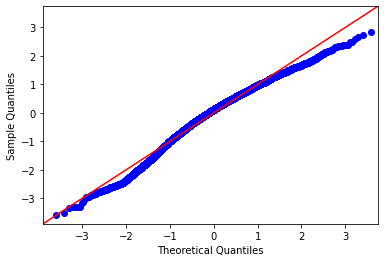

In [40]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

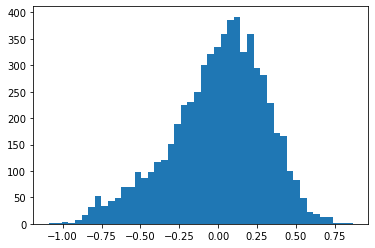

In [41]:
plt.hist(residuals, bins='auto');

# Transform

In [42]:
df_log = model_out.copy()

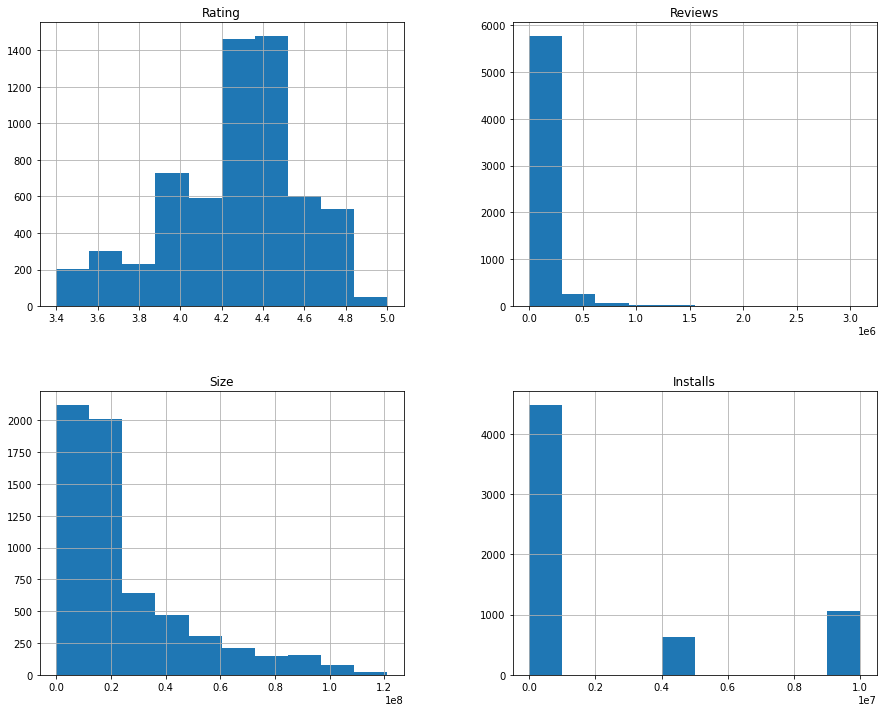

In [43]:
df_log[['Rating', 'Reviews', 'Size', 'Installs']].hist(figsize=(15,12));

All the continuous variable are very skewed. Major outliers with Reviews and Installs. 

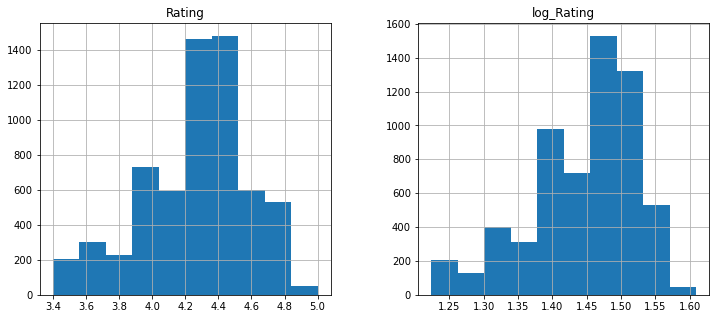

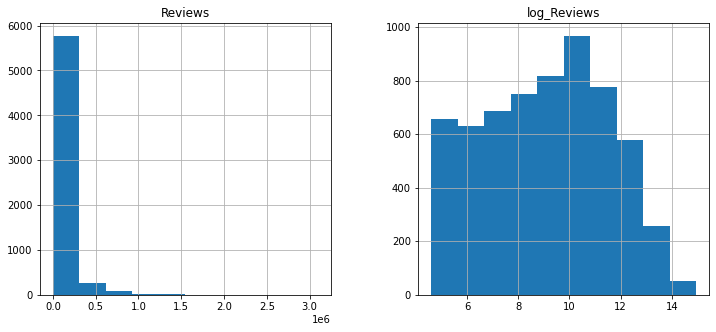

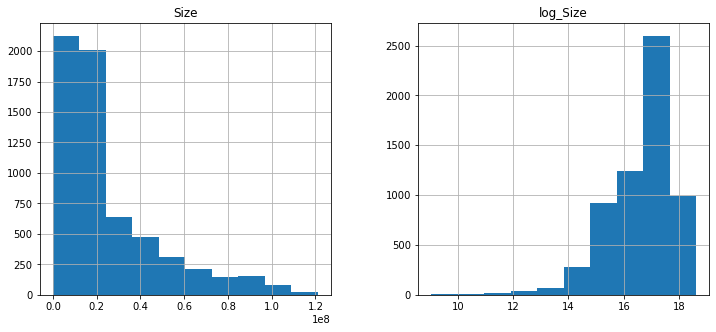

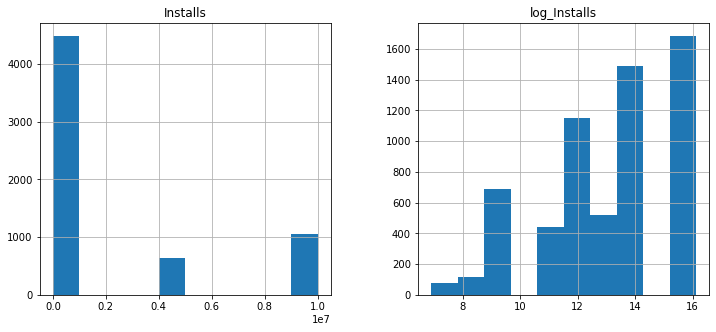

In [44]:
df_log['log_Rating'] = np.log(df_log['Rating'])
df_log[['Rating', 'log_Rating']].hist(figsize=(12,5));

df_log['log_Reviews'] = np.log(df_log['Reviews'])
df_log[['Reviews', 'log_Reviews']].hist(figsize=(12,5));

df_log['log_Size'] = np.log(df_log['Size'])
df_log[['Size', 'log_Size']].hist(figsize=(12,5));

df_log['log_Installs'] = np.log(df_log['Installs'])
df_log[['Installs', 'log_Installs']].hist(figsize=(12,5));

In [45]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

In [46]:
# df_log_norm = df_log[['log_Rating']]
df_log_norm = df_log[['log_Rating', 'log_Installs', 'log_Size', 'log_Reviews']]

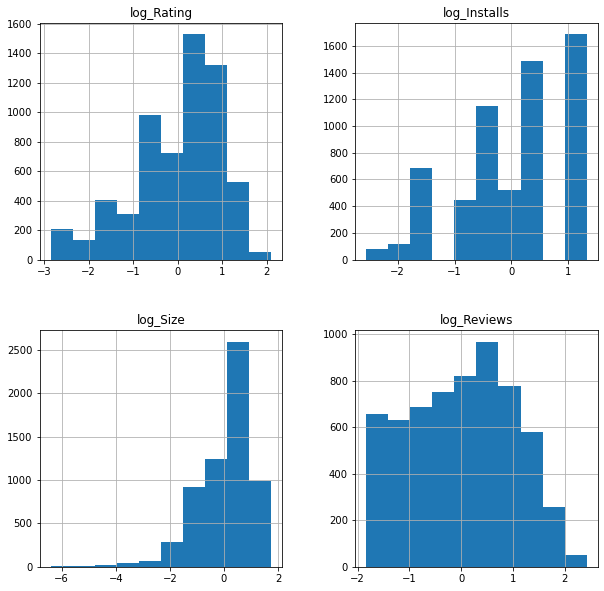

In [47]:
df_log_norm = df_log_norm.apply(normalize)
df_log_norm.hist(figsize=(10,10));

In [48]:
df_log['Rating'] = df_log_norm['log_Rating']
df_log['log_Installs'] = df_log_norm['log_Installs']
df_log['log_Size'] = df_log_norm['log_Size']
df_log['log_Reviews'] = df_log_norm['log_Reviews']

In [49]:
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6172 entries, 0 to 10475
Data columns (total 72 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rating                        6172 non-null   float64
 1   Reviews                       6172 non-null   float64
 2   Size                          6172 non-null   float64
 3   Installs                      6172 non-null   int64  
 4   Content_Rating                6172 non-null   int64  
 5   Genres                        6172 non-null   int64  
 6   is_free                       6172 non-null   int64  
 7   Category_AUTO_AND_VEHICLES    6172 non-null   uint8  
 8   Category_BEAUTY               6172 non-null   uint8  
 9   Category_BOOKS_AND_REFERENCE  6172 non-null   uint8  
 10  Category_BUSINESS             6172 non-null   uint8  
 11  Category_COMICS               6172 non-null   uint8  
 12  Category_COMMUNICATION        6172 non-null   uint8  
 13  Ca

In [50]:
df_log = df_log.drop(['Reviews', 'Installs', 'Size'], axis=1)

# Linear Regression

In [51]:
outcome = 'log_Rating'
predictors = df_log.drop(['Rating', 'log_Rating'], axis=1)
pred_sum = '+'.join(predictors.columns)
f = outcome + '~' + pred_sum
model = ols(f, df_log).fit()
print(f'List of predictors: {pred_sum}')
display(model.summary())

List of predictors: Content_Rating+Genres+is_free+Category_AUTO_AND_VEHICLES+Category_BEAUTY+Category_BOOKS_AND_REFERENCE+Category_BUSINESS+Category_COMICS+Category_COMMUNICATION+Category_DATING+Category_EDUCATION+Category_ENTERTAINMENT+Category_EVENTS+Category_FAMILY+Category_FINANCE+Category_FOOD_AND_DRINK+Category_GAME+Category_GAME_ACTION+Category_GAME_ADVENTURE+Category_GAME_ARCADE+Category_GAME_BOARD+Category_GAME_CARD+Category_GAME_CASINO+Category_GAME_CASUAL+Category_GAME_EDUCATIONAL+Category_GAME_MUSIC+Category_GAME_PUZZLE+Category_GAME_RACING+Category_GAME_ROLE_PLAYING+Category_GAME_SIMULATION+Category_GAME_SPORTS+Category_GAME_STRATEGY+Category_GAME_TRIVIA+Category_GAME_WORD+Category_HEALTH_AND_FITNESS+Category_HOUSE_AND_HOME+Category_LIBRARIES_AND_DEMO+Category_LIFESTYLE+Category_MAPS_AND_NAVIGATION+Category_MEDICAL+Category_MUSIC_AND_AUDIO+Category_NEWS_AND_MAGAZINES+Category_PARENTING+Category_PERSONALIZATION+Category_PHOTOGRAPHY+Category_PRODUCTIVITY+Category_SHOPPING+Ca

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             log_Rating   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.182
Method:                 Least Squares   F-statistic:                     21.54
Date:                Tue, 06 Apr 2021   Prob (F-statistic):          3.03e-228
Time:                        11:26:45   Log-Likelihood:                 7651.8
No. Observations:                6172   AIC:                        -1.517e+04
Df Residuals:                    6104   BIC:                        -1.471e+04
Df Model:                          67                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.4937      0.011    135.582      0.000       1.472       1.515
Content_Rating                  -0.0052      0.001     -5.261      0.000      -0.007      -0.003
Genres                       -5.361e-05   5.04e-05     -1.064      0.287      -0.000    4.52e-05
is_free                         -0.0079      0.004     -2.186      0.029      -0.015      -0.001
Category_AUTO_AND_VEHICLES      -0.0059      0.013     -0.444      0.657      -0.032       0.020
Category_BEAUTY                  0.0018      0.016      0.118      0.906      -0.029       0.033
Category_BOOKS_AND_REFERENCE     0.0085      0.011      0.747      0.455      -0.014       0.031
Category_BUSINESS               -0.0339      0.011     -2.971      0.003      -0.056      -0.012
Category_COMICS                 -0.0263      0.014     -1.898      0.058      -0.054       0.001
Category_COMMUNICATION          -0.0561      0.011     -5.037      0.000      -0.078      -0.034
Category_DATING                 -0.0691      0.012     -5.707      0.000      -0.093      -0.045
Category_EDUCATION              -0.0097      0.011     -0.860      0.390      -0.032       0.012
Category_ENTERTAINMENT          -0.0509      0.012     -4.207      0.000      -0.075      -0.027
Category_EVENTS                 -0.0082      0.017     -0.491      0.624      -0.041       0.025
Category_FAMILY                 -0.0364      0.010     -3.576      0.000      -0.056      -0.016
Category_FINANCE                -0.0415      0.011     -3.747      0.000      -0.063      -0.020
Category_FOOD_AND_DRINK         -0.0307      0.013     -2.416      0.016      -0.056      -0.006
Category_GAME                   -0.0412      0.010     -4.067      0.000      -0.061      -0.021
Category_GAME_ACTION            -0.0457      0.016     -2.944      0.003      -0.076      -0.015
Category_GAME_ADVENTURE         -0.0309      0.018     -1.700      0.089      -0.066       0.005
Category_GAME_ARCADE            -0.0228      0.019     -1.175      0.240      -0.061       0.015
Category_GAME_BOARD              0.0135      0.022      0.613      0.540      -0.030       0.057
Category_GAME_CARD              -0.0189      0.023     -0.806      0.420      -0.065       0.027
Category_GAME_CASINO             0.0292      0.017      1.741      0.082      -0.004       0.062
Category_GAME_CASUAL            -0.0223      0.025     -0.873      0.383      -0.072       0.028
Category_GAME_EDUCATIONAL       -0.0067      0.024     -0.273      0.785      -0.055       0.041
Category_GAME_MUSIC             -0.0194      0.037     -0.528      0.598      -0.091       0.053
Category_GAME_PUZZLE            -0.0021      0.018     -0.120      0.904      -0.037       0.033
Category_GAME_RACING            -0.0260      0.042     -0.617      0.537    

In [52]:
y = df_log['log_Rating']
X = df_log.drop(['Rating','log_Rating'], axis=1)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print(len(X_train), len(X_test), len(y_train), len(y_test))

4629 1543 4629 1543


In [54]:
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_hat_test)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('MAE:', mean_absolute_error(y_test, y_hat_test))
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)
print('Root Mean Squared Error Train:', rmse_train)
print('Root Mean Squared Error Test:', rmse_test)

MAE: 0.05644835003992378
Train Mean Squared Error: 0.004821590204266901
Test Mean Squared Error: 0.0052514264040375985
Root Mean Squared Error Train: 0.06943767136264652
Root Mean Squared Error Test: 0.07246672618545423


In [55]:
accuracy = linreg.score(X_test, y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: 14.64%'

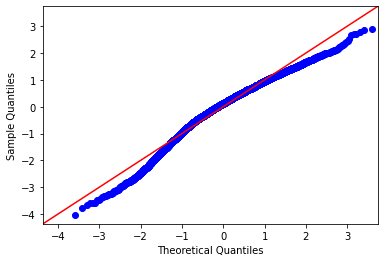

In [56]:
import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

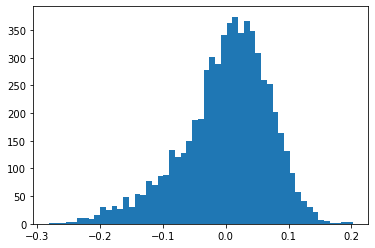

In [57]:
plt.hist(residuals, bins='auto');

# KNeighbors Regression

In [71]:
y = model_out['Rating']
X = model_out.drop('Rating', axis=1)

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [73]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

,Reviews,Size,Installs,Content_Rating,Genres,is_free,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,Category_EDUCATION,Category_ENTERTAINMENT,Category_EVENTS,Category_FAMILY,Category_FINANCE,Category_FOOD_AND_DRINK,Category_GAME,Category_GAME_ACTION,Category_GAME_ADVENTURE,Category_GAME_ARCADE,Category_GAME_BOARD,Category_GAME_CARD,Category_GAME_CASINO,Category_GAME_CASUAL,Category_GAME_EDUCATIONAL,Category_GAME_MUSIC,Category_GAME_PUZZLE,Category_GAME_RACING,Category_GAME_ROLE_PLAYING,Category_GAME_SIMULATION,Category_GAME_SPORTS,Category_GAME_STRATEGY,Category_GAME_TRIVIA,Category_GAME_WORD,Category_HEALTH_AND_FITNESS,Category_HOUSE_AND_HOME,Category_LIBRARIES_AND_DEMO,Category_LIFESTYLE,Category_MAPS_AND_NAVIGATION,Category_MEDICAL,Category_MUSIC_AND_AUDIO,Category_NEWS_AND_MAGAZINES,Category_PARENTING,Category_PERSONALIZATION,Category_PHOTOGRAPHY,Category_PRODUCTIVITY,Category_SHOPPING,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,1.116303,2.924631,2.038646,2.236164,0.786033,0.351488,-0.096832,-0.067508,-0.153825,-0.151603,-0.095689,-0.171327,-0.120267,-0.166593,-0.130916,-0.069104,-0.460885,-0.184885,-0.110661,-0.357665,-0.080766,-0.064199,-0.055078,-0.041608,-0.046529,-0.067508,-0.041608,-0.038917,-0.025466,-0.062480,-0.0147,12.594471,-0.076596,-0.036026,-0.089764,-0.0147,-0.0147,-0.181737,-0.100185,-0.084736,-0.177249,-0.113623,-0.145527,-0.032883,-0.156018,-0.083433,-0.18737,-0.164527,-0.179825,-0.147067,-0.160323,-0.191044,-0.289957,-0.147832,-0.13006,-0.109656,-0.218539,-0.251317,-0.24095,-0.317129,2.684669,-0.623235,-0.410663,-0.184259,-0.199393,-0.197038,-0.225502
1,-0.382348,0.647539,-0.657540,2.236164,-1.858197,0.351488,-0.096832,-0.067508,-0.153825,-0.151603,-0.095689,-0.171327,-0.120267,-0.166593,-0.130916,-0.069104,-0.460885,-0.184885,-0.110661,2.795915,-0.080766,-0.064199,-0.055078,-0.041608,-0.046529,-0.067508,-0.041608,-0.038917,-0.025466,-0.062480,-0.0147,-0.079400,-0.076596,-0.036026,-0.089764,-0.0147,-0.0147,-0.181737,-0.100185,-0.084736,-0.177249,-0.113623,-0.145527,-0.032883,-0.156018,-0.083433,-0.18737,-0.164527,-0.179825,-0.147067,-0.160323,-0.191044,-0.289957,-0.147832,-0.13006,-0.109656,-0.218539,-0.251317,-0.24095,-0.317129,-0.372485,-0.623235,2.435085,-0.184259,-0.199393,-0.197038,-0.225502
2,-0.163825,0.225855,-0.548603,-0.522685,0.556100,-2.845049,-0.096832,-0.067508,-0.153825,-0.151603,-0.095689,-0.171327,-0.120267,-0.166593,-0.130916,-0.069104,-0.460885,-0.184885,-0.110661,-0.357665,-0.080766,-0.064199,-0.055078,-0.041608,-0.046529,-0.067508,-0.041608,-0.038917,-0.025466,16.005207,-0.0147,-0.079400,-0.076596,-0.036026,-0.089764,-0.0147,-0.0147,-0.181737,-0.100185,-0.084736,-0.177249,-0.113623,-0.145527,-0.032883,-0.156018,-0.083433,-0.18737,-0.164527,-0.179825,-0.147067,-0.160323,-0.191044,-0.289957,-0.147832,-0.13006,-0.109656,-0.218539,-0.251317,-0.24095,-0.317129,-0.372485,-0.623235,-0.410663,-0.184259,-0.199393,-0.197038,-0.225502
3,0.070730,-0.900041,2.038646,-0.522685,1.274640,0.351488,-0.096832,-0.067508,-0.153825,-0.151603,-0.095689,-0.171327,-0.120267,-0.166593,-0.130916,-0.069104,-0.460885,-0.184885,-0.110661,-0.357665,-0.080766,-0.064199,-0.055078,-0.041608,-0.046529,-0.067508,-0.041608,-0.038917,-0.025466,-0.062480,-0.0147,-0.079400,-0.076596,-0.036026,-0.089764,-0.0147,-0.0147,-0.181737,-0.100185,-0.084736,-0.177249,-0.113623,-0.145527,-0.032883,-0.156018,-0.083433,-0.18737,-0.164527,-0.179825,-0.147067,-0.160323,-0.191044,3.448790,-0.147832,-0.13006,-0.109656,-0.218539,-0.251317,-0.24095,-0.317129,2.684669,-0.623235,-0.410663,-0.184259,-0.199393,-0.197038,-0.225502
4,-0.385760,-0.870523,-0.682051,-0.522685,0.326167,0.351488,-0.096832,-0.067508,-0.153825,-0.151603,-0.095689,-0.171327,-0.120267,-0.166593,-0.130916,-0.069104,-0.

In [75]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

# Instantiate KNeighborsClassifier

# Fit the classifier
knn.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = knn.predict(scaled_data_test)

In [79]:
accuracy = knn.score(X_test, y_test)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

'Accuracy: -8.54%'

In [66]:
model = KNeighborsRegressor(n_neighbors=200,weights='distance')
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

In [67]:
mse_train = mean_squared_error(y_train, y_hat_train)
mse_test = mean_squared_error(y_test, y_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print('MAE:', mean_absolute_error(y_test, y_pred))
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)
print('Root Mean Squared Error Train:', rmse_train)
print('Root Mean Squared Error Test:', rmse_test)

MAE: 0.06054151360637499
Train Mean Squared Error: 0.004821590204266901
Test Mean Squared Error: 0.005796951679803287
Root Mean Squared Error Train: 0.06943767136264652
Root Mean Squared Error Test: 0.07613771522578865


In [70]:
accuracy = model.score(y_test, y_pred)
'Accuracy: ' + str(np.round(accuracy*100, 2)) + '%'

ValueError: Expected 2D array, got 1D array instead:
array=[1.41098697 1.48160454 1.41098697 ... 1.43508453 1.43508453 1.36097655].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Random Forest